In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from botocore.exceptions import NoCredentialsError
from minio import Minio
import os 
import io

In [4]:
minio_client = Minio(
    "127.0.0.1:8000",
    access_key="admin",
    secret_key="password",
    secure=False  
)

data_object = minio_client.get_object('csv', 'kesehatan/heart_attack_prediction_dataset.csv')

In [5]:
pd.set_option('display.max_columns',None)
df = pd.read_csv(data_object)
df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [6]:
features = df[['Age','Cholesterol','Heart Rate','Stress Level','BMI','Triglycerides','Physical Activity Days Per Week']]
target = df[['Heart Attack Risk']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
gnb_model = GaussianNB()
gnb_model.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)

print("Gaussian Naive Bayes Accuracy: ", accuracy_score(y_test, gnb_pred))
print("\nGaussian Naive Bayes Confusion Matrix: \n", confusion_matrix(y_test, gnb_pred))
print("\nGaussian Naive Bayes Classification Report: \n", classification_report(y_test, gnb_pred))

Gaussian Naive Bayes Accuracy:  0.6432103461392165

Gaussian Naive Bayes Confusion Matrix: 
 [[1691    0]
 [ 938    0]]

Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       0.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.32      0.50      0.39      2629
weighted avg       0.41      0.64      0.50      2629



C:\Users\andar\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\andar\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andar\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andar\AppData\Roaming\Python\Python310

In [10]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)

print("Random Forest Accuracy: ", accuracy_score(y_test, rf_pred))
print("\nRandom Forest Confusion Matrix: \n", confusion_matrix(y_test, rf_pred))
print("\nRandom Forest Classification Report: \n", classification_report(y_test, rf_pred))

C:\Users\andar\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Accuracy:  0.6215290985165463

Random Forest Confusion Matrix: 
 [[1565  126]
 [ 869   69]]

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.93      0.76      1691
           1       0.35      0.07      0.12       938

    accuracy                           0.62      2629
   macro avg       0.50      0.50      0.44      2629
weighted avg       0.54      0.62      0.53      2629



In [11]:
gnb_cm = confusion_matrix(y_test, gnb_pred)
rf_cm = confusion_matrix(y_test, rf_pred)


Gaussian Naive Bayes Classification Report: 
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1691
           1       1.00      0.00      0.00       938

    accuracy                           0.64      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.64      0.50      2629


Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.93      0.76      1691
           1       0.35      0.07      0.12       938

    accuracy                           0.62      2629
   macro avg       0.50      0.50      0.44      2629
weighted avg       0.54      0.62      0.53      2629



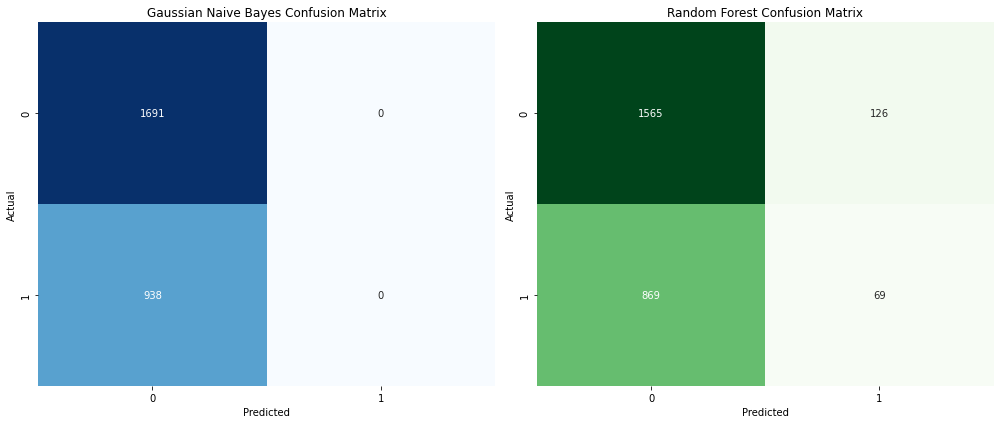

In [12]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.heatmap(gnb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Gaussian Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()

print("\nGaussian Naive Bayes Classification Report: \n", classification_report(y_test, gnb_pred, zero_division=1))
print("\nRandom Forest Classification Report: \n", classification_report(y_test, rf_pred, zero_division=1))

plt.show()